# Uygulama Notları: 12
## FİZ219 - Bilgisayar Programlama I | 25/01/2020
**String Değişkenleri**
* Giriş
* Tanımlama
* Kıyaslama
* Yeni string değişkenleri oluşturmak
    * Dizi Muamelesi çekmek
    * strcat() ve cstrcat() fonksiyonları
    * printf() fonksiyonu ve string değişkenleri
    * sprintf() fonksiyonu
* Meydan Okuma (Challenge)

Emre S. Tasci emre.tasci@hacettepe.edu.tr

# Giriş
Şu ana kadar Octave ile ağırlıklı (neredeyse istisnasız) olarak sayılar üzerine çalıştık ki, Octave'ın mühendislik uygulamalarında kullanmak üzere geliştirildiğini düşünürsek bu zaten beklenen bir şeydi. Fakat bazen, özellikle de başka programlarda kullanacağımız çıktılar oluşturmak istediğimiz zaman, çıktımızı belirli bir biçimde sunmak isteriz. `printf()` fonksiyonunu bu işler kullanabileceğimizi gördük ama şimdiye kadar ele aldığımız tüm kullanımlarda yazı kısmı sabit olup, sayısal değerler değişiyordu, örneğin:

In [1]:
for i = 3:8
    printf("Elimizdeki sayi: %d --> Bu sayi ",i)
    if(mod(i,2)==0)
        printf("cift bir sayidir.\n");
    else
        printf("tek bir sayidir.\n");
    endif
endfor
    

Elimizdeki sayi: 3 --> Bu sayi tek bir sayidir.
Elimizdeki sayi: 4 --> Bu sayi cift bir sayidir.
Elimizdeki sayi: 5 --> Bu sayi tek bir sayidir.
Elimizdeki sayi: 6 --> Bu sayi cift bir sayidir.
Elimizdeki sayi: 7 --> Bu sayi tek bir sayidir.
Elimizdeki sayi: 8 --> Bu sayi cift bir sayidir.


Octave'da -çok gelişmiş olmasa da- sözcükler ve harfler için de bir değişken türü vardır. Harf dizilerinden (sözcük) ve sözcük takımlarından (cümle) oluşan bu değişkenler **string** değişkeni olarak adlandırılırlar. Tanım itibarı ile dizidirler. 

# Tanımlama
String değişkenleri tırnak (") içinde tanımlanır.

In [2]:
isim = "Batuhan"

isim = Batuhan


şeklinde değeri "Batuhan" olan, `isim` adında bir string değişkeni tanımladığımızda, bu aslıdan 7 elemanı olan bir dizidir. Bir sayı dizisinin çeşitli elemanlarına nasıl ulaşabiliyorsak,  string değişkeninin (_harf dizisinin_) elemanlarına da aynı şekilde ulaşabiliriz:

In [3]:
isim(2) % 2. eleman (harf)
isim(4:6) % 4.,5.,6. harfler 
isim(5:end-1) % 5. harften sondan bir önceki harfe kadar
isim(1:2:7) % 1. harften 7. harfe bir atlayarak (2 ekleyerek)
isim(3:-1:1) % 3. harften 1. harfe geriye doğru

ans = a
ans = uha
ans = ha
ans = Bthn
ans = taB


Her harfin bir sayısal değeri vardır, bu değerler için ASCII standardı verilen bir değerler tablosu kullanılır. Örneğin "A" karakterine 65; "B"ye 66; "a"ya 97; "b"ye 98 karşılık gelir. Bu karşılıkları printf'e bir string değişkeni besleyip, çıktıyı tam sayı olarak isteyerek görebiliriz:

In [4]:
str1 = "ABCabc";
printf("%d\n",str1);

65
66
67
97
98
99


ASCII tablosu 128 (2^7) değerden oluşup, 60'lı yıllarda bilgisayar sistemleri arasında uyum olması için standartlaştırılmıştır. Sadece yazılı karakterleri değil, bilgisayara verilecek işaretleri (_"satır sonu", "sekme", "escape (çıkış) sinyali", vs._) de içerir:
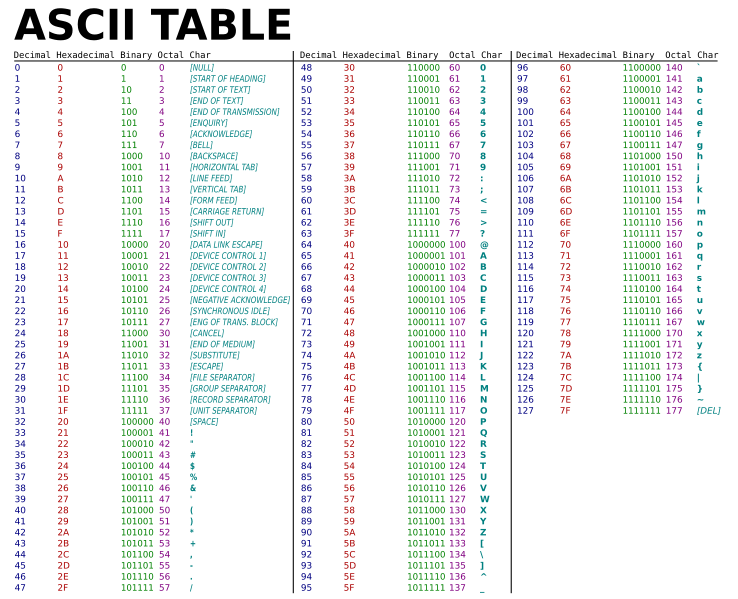
Kaynak: [Wikipedia](https://en.wikipedia.org/wiki/File:ASCII-Table.svg)

Sonrasında (günümüzde) UTF-8 standardı kabul edilip, öntanımlı karakter sayısı 1112064'e çıkarılmıştır (UTF-8'in ilk 128 karakteri ASCII tablosuna karşılık gelmektedir -- aslında Octave'da UTF-8 desteği vardır -yani Türkçe karakterleri de destekler- ama işleri karıştırmamak adına 128'lik ASCII'de duracağız ;).

Sayısal değerleri `char` komutu ile harflere dönüştürebiliriz. Örneğin, yukarıdaki tablodan bakarak "Fiz219" yazalım (rakamların da tıpkı harfler gibi farklı indislere sahip olduğuna dikkat edin -- mesela 1 -> 49):

In [5]:
dizi = [70, 105, 122, 50, 49, 57];
str2 = char(dizi)

str2 = Fiz219


Bu sayı <-> harf karşılığından ötürü, harf dizimizi doğrudan dizi olarak da tanımlayabilirdik:

In [6]:
str3 = ["F", "i", "z", "2", "1", "9"]

str3 = Fiz219


Neyse ki, her seferinde bu kadar uğraşmamak için, başta gösterdiğimiz tırnak içinde tanım yöntemi var:

In [7]:
str4 = "Fiz219"

str4 = Fiz219


Aynı şekilde, tırnak(") yerine kesme (') işareti de kullanılabilmektedir.

# Kıyaslama
İki sayıyı büyüklük, küçüklük ve eşitlik kriterleri ile nasıl kıyaslayabileceğimizi biliyoruz: <,>,==,!=,<= ve >= operatörleri ile. Bu operatörleri harf bazında string değişkenlerine de uygulayabiliriz:

In [8]:
% "a", "b"den büyük mü (yani sonra mı geliyor)?
"a" > "b" 

ans = 0


In [9]:
% "a", "b"den küçük mü (yani önce mi geliyor)?
"a" < "b"

ans = 1


In [10]:
% "a", "b"ye eşit mi (yani ASCII tablosunda aynı yerde mi)?
"a" == "b"

ans = 0


İşler buraya kadar iyi idi, hatta bu değerleri değişkenlere atadığımızda da yolunda gidiyor gibi görünüyor:

In [11]:
str5 = "a"
str6 = "b"
str5 > str6
str5 < str6
str5 == str6

str5 = a
str6 = b
ans = 0
ans = 1
ans = 0


Fakat, string değişkenlerimiz birden fazla harften oluştuğu zaman işler biraz karışıyor:

In [12]:
str7 = "Bilgisayar "
str8 = "Programlama"
str7 > str8

str7 = Bilgisayar 
str8 = Programlama
ans =

  0  0  0  0  0  1  0  1  0  1  0



Aslında karışan bir şey yok, Octave, kendinden beklendiği üzere, verilen iki diziyi (string değişkenlerinin harf dizileri olduğunu hatırlayın), eleman bazında kıyaslıyor. Burada aslında şu soruyu sormuş olduk: "Bilgisayar " kelimesinin (_harf **dizisinin**_) hangi harfleri alfabede (_ASCII Tablosunda_) "Programlama" kelimesinde karşılık gelen harften sonra yer almaktadır? Cevap olarak bize verdiği: "1" (_Doğru_) olarak döndürülen, 6.,8. ve 10. harfler, yani: "s","y" ve "r" harfleri:

In [13]:
str7(str7>str8)

ans = syr


Octave açısından "Bilgisayar " ve "programlama" kelimelerini kıyaslamakla, [66, 105, 108, 103, 105, 115, 97, 121, 97, 114, 32] ile [112, 114, 111, 103, 114, 97, 109, 108, 97, 109, 97] dizilerini kıyaslamak arasında hiçbir fark yok.

Bunu görünce, iki string değişkeninin birbirine eşitliğinin sorgulanmasının da pek istediğimiz gibi sonuçlanmayacağı ortada. Nitekim:

In [14]:
str7 == str8

ans =

  0  0  0  1  0  0  0  0  1  0  0



evet, gerçekten de iki kelimenin 4. ("g") ve sonran iki önceki "a" harfleri birbirine eşit ama bizim aklımızdaki iki kelimenin tümüyle birbirine eşit olup olmadığı idi. Tabii ki bunu, verilen bir dizinin *tüm* elemanlarının <u>sıfırdan farklı</u> olup olmadıklarını döndüren `any()` fonksiyonunu kullanarak 2 adımda yapabiliriz ama her seferinde bu kadar uğraşmayalım diye, `strcmp()` (Sözcük kıyasla: "{str}ing 
{c}o{mp}are") diye bir fonksiyon üretmişler:

In [15]:
% str7 değişkeninde tutulan kelime, str8'dekiyle aynı mı?
strcmp(str7,str8)

ans = 0


Hazır strcmp'u kullanmaya başlamışken, yukarıda farklı farklı şekillerde tanımladığımız string değişkenlerinin birbirlerine eşitliğini de kontrol edelim:

In [16]:
dizi = [70, 105, 122, 50, 49, 57];
str2 = char(dizi)

str3 = ["F", "i", "z", "2", "1", "9"]
str4 = "Fiz219"


str2 = Fiz219
str3 = Fiz219
str4 = Fiz219


In [17]:
strcmp(str2, str3)
strcmp(str3, str4)

ans = 1
ans = 1


Görüldüğü üzere, tanım yöntemleri birbirine eşdeğer. Bir de büyük/küçük harf olayı var. Biliyoruz ki, büyük harflerle küçük harfler ASCII tablosunda farklı yerlere karşılık geldiğinden (örn: "A" : 65 & "a" : 97) eşitlik olmayacak ama bu da çoğu zaman çok da arzu ettiğimiz bir şey değil. Bu işin de üstesinden -en azından İngiliz alfabesindeki harflerde- büyük/küçük harf ayrımı yapmayan `strcmpi()` fonksiyonu geliyor (sondaki "i", _Büyük/küçük durumu yoksay_'ın İngilizcesi _{i}gnore case_'den geliyor):

In [18]:
str4 = "Fiz219"
str9 = "FIZ219"
str10 = "FIz219"

strcmp(str4,str9)
strcmp(str4,str10)

strcmpi(str4,str9)
strcmpi(str4,str10)

str4 = Fiz219
str9 = FIZ219
str10 = FIz219
ans = 0
ans = 0
ans = 1
ans = 1


# Yeni string değişkenleri oluşturmak
## Dizi muamelesi çekmek
Yeni string değişkenleri oluşturmak için, öncelikle elimizdeki mevcut string değişkenlerinden yola çıkabiliriz. Örneğin:


In [19]:
str1 = "Merhaba"
str2 = "Dünya!"

str1 = Merhaba
str2 = Dünya!


şeklinde iki değişkenimiz olsun, biz de "Merhaba Dünya!" şeklinde bunların birleşimi olan üçüncü bir değişken kurmak istiyoruz. Birinci yöntem, klasik, string'leri harf dizisi olarak ele almak, nasıl ki iki diziyi köşeli parantezler içerisinde toplayıp birleştirebiliyorduk, burada da çalışması lazım:

In [20]:
sayi1 = [1 2 3]
sayi2 = [5 6 7]
sayi3 = [sayi1 sayi2]

sayi1 =

   1   2   3

sayi2 =

   5   6   7

sayi3 =

   1   2   3   5   6   7



Harf dizilerimize de uygulayalım bakalım:

In [21]:
str1 = "Merhaba"
str2 = "Dünya!"
str3 = [str1 str2]

str1 = Merhaba
str2 = Dünya!
str3 = MerhabaDünya!


Kelimelerin birbirine yapışık olması dışında fena değil! Araya koyacağımız boşluğu da bir eleman olarak ele alıp bir daha deneyelim:

In [22]:
str3 = [str1 " " str2]

str3 = Merhaba Dünya!


## strcat() ve cstrcat() fonksiyonları
Yine çok uğraştırmamak adına, Octave'da bu birleştirme işlerini yapan öntanımlı bir fonksiyon da mevcuttur: `strcat()` (_string birleştir_ : _{str}ing con{cat}anate_)

In [23]:
str4 = strcat(str1,str2)

str4 = MerhabaDünya!


In [24]:
% sondaki bosluklar, sekmeler, vs. strcat tarafindan yoksayilir:
str5 = strcat("Merhaba ","Dunya")

str5 = MerhabaDunya


In [25]:
% bastaki bosluklar, sekmeler, vs. strcat tarafindan ele alinir:
str6 = strcat("Merhaba"," Dunya")

str6 = Merhaba Dunya


Eğer sondaki boşlukları korumak istiyorsanız, `cstrcat()` komutunu kullanabilirsiniz:

In [26]:
strcat("Merhaba ","Dunya")
cstrcat("Merhaba ","Dunya")
disp("-----------------")
strcat("Merhaba"," ","Dunya")
cstrcat("Merhaba"," ","Dunya")

ans = MerhabaDunya
ans = Merhaba Dunya
-----------------
ans = MerhabaDunya
ans = Merhaba Dunya


## printf() fonksiyonu ve string değişkenleri
Çıktı biçimlemede sıkça kullandığımız `printf()` fonksiyonumuz, şaşırtıcı olmayan bir biçimde, sayılara ilave olarak string değişkenlerini de destekler. Yapmamız gereken, değişkenimizin string olacağını belirtmek için '%s' yertutucusunu kullanmaktır:

In [27]:
printf("Dersimizin adi: %s.\n","FIZ219 - Bilgisayar Programlama");

Dersimizin adi: FIZ219 - Bilgisayar Programlama.


Çok da faydalı bir şey olacakmış gibi görünmüyor ama bir de şu kullanımına bakalım: baştaki tek/çift ayırıcısını hatırlayın, onu bir daha yazalım:

In [28]:
for i = 3:8
    if(mod(i,2)==0)
        tekcift = "cift";
    else
        tekcift = "tek";
    endif
    printf("Elimizdeki sayi: %d --> Bu sayi %s bir sayidir.\n",i,tekcift)
endfor

Elimizdeki sayi: 3 --> Bu sayi tek bir sayidir.
Elimizdeki sayi: 4 --> Bu sayi cift bir sayidir.
Elimizdeki sayi: 5 --> Bu sayi tek bir sayidir.
Elimizdeki sayi: 6 --> Bu sayi cift bir sayidir.
Elimizdeki sayi: 7 --> Bu sayi tek bir sayidir.
Elimizdeki sayi: 8 --> Bu sayi cift bir sayidir.


Madem printf()'i kullanıyoruz, onun nimetlerinden de faydalanabiliriz, örneğin sabit bir yer ayırabiliriz veya sağa/sola yaslayabiliriz:

In [29]:
str = "Deneme";
printf("Denemeye 10 karakter ayarlayalim:%10s.\n",str) % Saga yaslanmis
printf("Denemeye 10 karakter ayarlayalim:%-10s.\n",str)% Sola yaslanmis

Denemeye 10 karakter ayarlayalim:    Deneme.
Denemeye 10 karakter ayarlayalim:Deneme    .


Sizce `printf` fonksiyonunun çıktısı nedir? İçinde harfler var, dolayısıyla doğru tahmin ettiniz: printf, string türünde çıktı verir!

Fakat verdiği bu çıktı, sadece ekrana yazdırmak içindir. Bu farkı anlamak için aşağıdaki fonksiyonu inceleyelim:

In [30]:
function f = topla(a,b)
a+b
endfunction

topla(3,5)

ans =  8


Görünürde gayet eli yüzü düzgün bir fonksiyon olup, verilen iki sayıyı topluyor. Peki, biz o toplamı alıp bir başka yerde kullanabiliyor muyuz? Düşünün bakalım...

Maalesef hayır, çünkü fonksiyonun döndürdüğü hiçbir değer yok! Hesabı yapmasına yapıyor ama döndürmüyor. Yani:

deyince, bir ihtimal tahmininizin aksine, `toplam` değişkeninin değerini 8 yapmıyor (ekrana 8 yazsa dahi):

In [31]:
toplam = topla(3,5)

ans =  8
error: value on right hand side of assignment is undefined


Fonksiyona tekrar baktığımızda, dönüş değerini (bu örnekte "f") tanımlamamış olduğumuzu fark ediyoruz, doğrusu şöyle olmalıydı:

In [32]:
function f = topla(a,b)
f = a+b
endfunction

toplam = topla(3,5)


f =  8
toplam =  8


`printf`'in yaptığı da buna benzer bir şey: kendisine verilen değişkenleri güzelce biçimler, ekrana yazar ama döndürdüğü değer aslında ekrana yazdığı şey değil de, toplam karakter sayısıdır:

In [33]:
str1 = "Merhaba"
str2 = "Dunya!"
% Merhaba Dunya!
% 12345678901234  : Bastan sona toplam 14 karakter
donus_degeri = printf("%s %s",str1,str2)

str1 = Merhaba
str2 = Dunya!
Merhaba Dunya!donus_degeri =  14


## sprintf() fonksiyonu
...keşke `printf`le yazdığımız string çıktılarını ekrana değil de, bir string değişkenine yönlendirebileceğimiz bir yol olsaydı... Aaaa, böyle bir yol var aslında! **`sprintf()`** fonksiyonu!!!

In [34]:
str1 = "Merhaba"
str2 = "Dunya!"
donus_degeri = sprintf("%s %s",str1,str2)
donus_degeri

str1 = Merhaba
str2 = Dunya!
donus_degeri = Merhaba Dunya!
donus_degeri = Merhaba Dunya!


Bu şekilde artık istediğimiz -hemen hemen- her şeyi yapabiliriz, mesela:

In [35]:
printf("%s %s %s\n",donus_degeri,donus_degeri,donus_degeri)

Merhaba Dunya! Merhaba Dunya! Merhaba Dunya!


(Bu yukarıdaki örnek çok da aydınlatıcı olmadı, şunu deneyelim bir de:)

In [36]:
function f = merhaba(isim)
f = sprintf("Merhaba %s!\n",isim);
endfunction

md = merhaba("Dunya")
me = merhaba("Emre")


md = Merhaba Dunya!

me = Merhaba Emre!



## Meydan Okuma (_Challenge_)
Daha gelişmişini size "meydan okuma" olarak vereyim:

Verilen 4 basamaklı bir sayıyı yazı olarak döndüren bir fonksiyon yazın. 

Örneğin:  
`sayi2yazi(1234)` -> _"bin iki yüz otuz dört"_  
döndürsün.